<ipython-input-1-a4cc3437e047>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)


Final Portfolio Value: 567061.3267252927


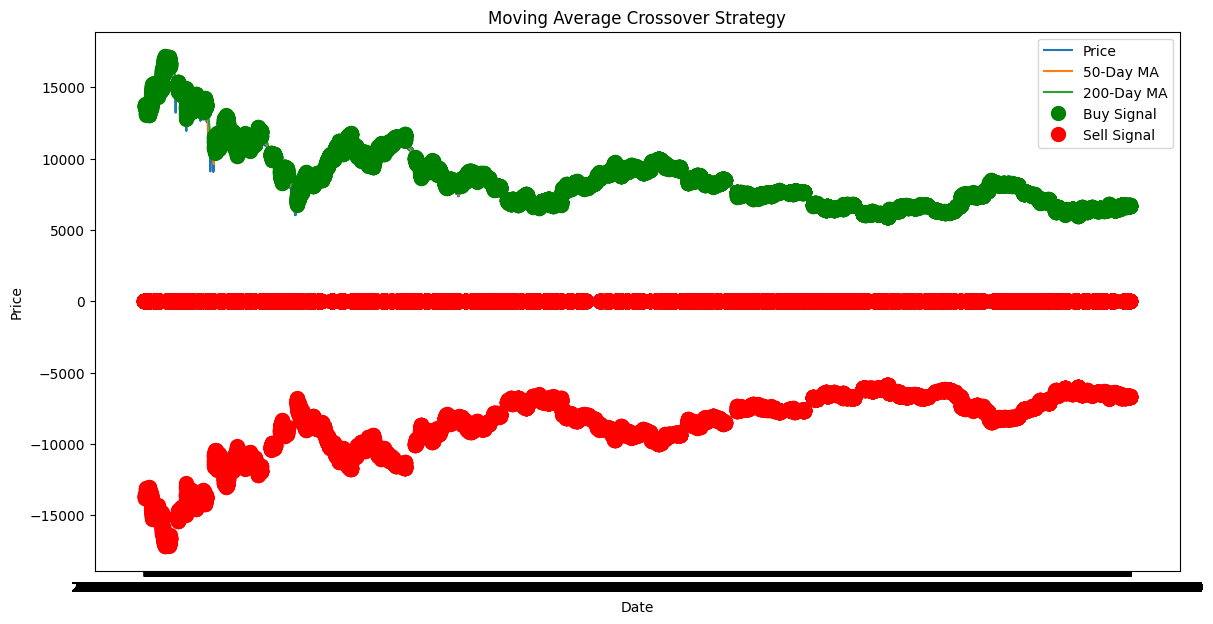

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/btc_18_22_5m.csv')


short_window = 50
long_window = 200

data['Short_MA'] = data['close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['close'].rolling(window=long_window, min_periods=1).mean()


data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()


initial_capital = 1000000
position = 0
capital = initial_capital

for i in range(len(data)):
    if data['Position'][i] == 1:
        position = capital / data['close'][i]
        capital = 0
    elif data['Position'][i] == -1:
        capital = position * data['close'][i]
        position = 0

final_portfolio_value = capital if capital > 0 else position * data['close'].iloc[-1]


print("Final Portfolio Value:", final_portfolio_value)


plt.figure(figsize=(14,7))
plt.plot(data['datetime'], data['close'], label='Price')
plt.plot(data['datetime'], data['Short_MA'], label='50-Day MA')
plt.plot(data['datetime'], data['Long_MA'], label='200-Day MA')
plt.plot(data['datetime'], data['Signal'] * data['close'], marker='o', markersize=10, lw=0, label='Buy Signal', color='g', linestyle='')
plt.plot(data['datetime'], -data['Signal'] * data['close'], marker='o', markersize=10, lw=0, label='Sell Signal', color='r', linestyle='')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:

import pandas as pd
import numpy as np

data = pd.read_csv('/content/btc_18_22_5m.csv')


short_window = 75
long_window = 175

data['Short_MA'] = data['close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['close'].rolling(window=long_window, min_periods=1).mean()


data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, 0)
data['Position'] = data['Signal'].diff()


initial_capital = 1000000
capital = initial_capital
shares = 0


signals = []
profits_losses = []

for i in range(len(data)):
    if data['Position'][i] == 1:
        shares = capital / data['close'][i]
        capital = 0
        signals.append('Buy')
    elif data['Position'][i] == -1:
        capital = shares * data['close'][i]
        shares = 0
        signals.append('Sell')
    else:
        signals.append('Hold')
    if i > 0 and data['Position'][i] != data['Position'][i - 1]:
        pnl = (capital + shares * data['close'][i]) - initial_capital
        profits_losses.append(pnl)
    else:
        profits_losses.append(0)

result = pd.DataFrame({'Date': data['datetime'], 'Signal': signals, 'Profit/Loss': profits_losses})

result.to_csv('movingaverage_backtest_results.csv', index=False)

print("Backtesting results saved successfully!")


Backtesting results saved successfully!


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/btc_18_22_5m.csv')


def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)


oversold_threshold = 30
overbought_threshold = 70

data['Signal'] = 0
data.loc[data['RSI'] < oversold_threshold, 'Signal'] = 1
data.loc[data['RSI'] > overbought_threshold, 'Signal'] = -1


initial_capital = 1000000
capital = initial_capital
shares = 0


signals = []
profits_losses = []

for i in range(len(data)):
    if data['Signal'][i] == 1:
        shares = capital / data['close'][i]
        capital = 0
        signals.append('Buy')
    elif data['Signal'][i] == -1:
        capital = shares * data['close'][i]
        shares = 0
        signals.append('Sell')
    else:
        signals.append('Hold')


    if i > 0 and data['Signal'][i] != data['Signal'][i - 1]:
        pnl = (capital + shares * data['close'][i]) - initial_capital
        profits_losses.append(pnl)
    else:
        profits_losses.append(0)
result = pd.DataFrame({'Datetime': data['datetime'], 'Signal': signals, 'Profit/Loss': profits_losses})

result.to_csv('rsi_backtest_results.csv', index=False)

print("RSI trading strategy backtesting results saved successfully!")


RSI trading strategy backtesting results saved successfully!


In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv('/content/btc_18_22_5m.csv')


historical_period = 30
data['SD'] = data['close'].rolling(window=historical_period).std()


initial_capital = 1000000
capital = initial_capital
shares = 0
position_size = 0.05


signals = []
profits_losses = []

for i in range(len(data)):
    current_price = data['close'][i]
    current_sd = data['SD'][i]
    position_size = 0.05 * (1 / (current_sd / data['close'].mean()))
    shares = capital * position_size / current_price
    capital = 0
    signals.append('Buy')
    pnl = (capital + shares * current_price) - initial_capital
    profits_losses.append(pnl)
result = pd.DataFrame({'Date': data['datetime'], 'Signal': signals, 'Profit/Loss': profits_losses})
result.to_csv('volatility_position_sizing_results.csv', index=False)

print("Volatility-based position sizing strategy backtesting results saved successfully!")


Volatility-based position sizing strategy backtesting results saved successfully!


In [ ]:
import pandas as pd


data = pd.read_csv('/content/btc_18_22_5m.csv')


support_level = data['low'].min()
resistance_level = data['high'].max()


data['Signal'] = 'Hold'
data.loc[data['close'] <= support_level, 'Signal'] = 'Buy'
data.loc[data['close'] >= resistance_level, 'Signal'] = 'Sell'


initial_capital = 1000000
capital = initial_capital
shares = 0


signals = []
profits_losses = []

for i in range(len(data)):
    if data['Signal'][i] == 'Buy':
        shares = capital / data['close'][i]
        capital = 0
        signals.append('Buy')
    elif data['Signal'][i] == 'Sell':
        capital = shares * data['close'][i]
        shares = 0
        signals.append('Sell')
    else:
        signals.append('Hold')
    if i > 0 and data['Signal'][i] != data['Signal'][i - 1]:
        pnl = (capital + shares * data['close'][i]) - initial_capital
        profits_losses.append(pnl)
    else:
        profits_losses.append(0)
result = pd.DataFrame({'Date': data['datetime'], 'Signal': signals, 'Profit/Loss': profits_losses})
result.to_csv('support_resistance_backtest_results.csv', index=False)

print("Support and Resistance trading strategy backtesting results saved successfully!")


Support and Resistance trading strategy backtesting results saved successfully!


In [ ]:
import pandas as pd
data = pd.read_csv('/content/btc_18_22_5m.csv')

short_window = 12
long_window = 26
signal_window = 9

short_ema = data['close'].ewm(span=short_window, min_periods=1).mean()
long_ema = data['close'].ewm(span=long_window, min_periods=1).mean()


macd_line = short_ema - long_ema


signal_line = macd_line.ewm(span=signal_window, min_periods=1).mean()


data['Signal'] = 0
data.loc[macd_line > signal_line, 'Signal'] = 1  # Buy signal
data.loc[macd_line < signal_line, 'Signal'] = -1  # Sell signal

initial_capital = 1000000
capital = initial_capital
shares = 0

signals = []
profits_losses = []

for i in range(len(data)):
    if data['Signal'][i] == 1:
        shares = capital / data['close'][i]
        capital = 0
        signals.append('Buy')
    elif data['Signal'][i] == -1:
        capital = shares * data['close'][i]
        shares = 0
        signals.append('Sell')
    else:
        signals.append('Hold')
    if i > 0 and data['Signal'][i] != data['Signal'][i - 1]:
        pnl = (capital + shares * data['close'][i]) - initial_capital
        profits_losses.append(pnl)
    else:
        profits_losses.append(0)
result = pd.DataFrame({'Date': data['datetime'], 'Signal': signals, 'Profit/Loss': profits_losses})
result.to_csv('macd_backtest_results.csv', index=False)
print("MACD trading strategy backtesting results saved successfully!")


MACD trading strategy backtesting results saved successfully!


In [ ]:
import pandas as pd
import numpy as np

# Load historical price data
data = pd.read_csv('/content/btc_18_22_5m.csv')   # Replace 'historical_data.csv' with your file name

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate buy and sell signals based on RSI
oversold_threshold = 30
overbought_threshold = 70

data['Signal'] = 0
data.loc[data['RSI'] < oversold_threshold, 'Signal'] = 1  # Buy signal
data.loc[data['RSI'] > overbought_threshold, 'Signal'] = -1  # Sell signal

# Backtesting
initial_capital = 1000000
capital = initial_capital
shares = 0

# List to store signals, profits, and losses
signals = []
profits_losses = []

for i in range(len(data)):
    if data['Signal'][i] == 1:
        # Buy
        shares = capital / data['close'][i]
        capital = 0
        signals.append('Buy')
    elif data['Signal'][i] == -1:
        # Sell
        capital = shares * data['close'][i]
        shares = 0
        signals.append('Sell')
    else:
        signals.append('Hold')

    # Calculate profit or loss for inter-day trades
    if i > 0 and data['Signal'][i] != data['Signal'][i - 1]:
        pnl = (capital + shares * data['close'][i]) - initial_capital
        profits_losses.append(pnl)
    else:
        profits_losses.append(0)

# Create a DataFrame for signals, profits, and losses
result = pd.DataFrame({'Date': data['datetime'], 'Signal': signals, 'Profit/Loss': profits_losses})

# Save results to a new CSV file
result.to_csv('rsi_backtest_results.csv', index=False)

print("RSI trading strategy backtesting results saved successfully!")


RSI trading strategy backtesting results saved successfully!


In [ ]:
import backtrader as bt
import datetime
import pandas as pd

class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.sellprice = None
        self.trade_details = []

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED at %.2f' % order.executed.price)
                self.buyprice = order.executed.price
            elif order.issell():
                self.log('SELL EXECUTED at %.2f' % order.executed.price)
                self.sellprice = order.executed.price
                self.trade_details.append({
                    'Date': self.datas[0].datetime.datetime(0),
                    'EntryPrice': self.buyprice,
                    'ExitPrice': self.sellprice,
                    'ProfitLoss': self.sellprice - self.buyprice
                })
            self.bar_executed = len(self)

        self.order = None

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])

        if self.order:
            return

        if not self.position:
            if self.dataclose[0] < self.dataclose[-1]:
                if self.dataclose[-1] < self.dataclose[-2]:
                    self.log('BUY CREATE, %.2f' % self.dataclose[0])
                    self.order = self.buy()
        else:
            if len(self) >= (self.bar_executed + 5):
                self.log('SELL CREATED at %.2f' % self.dataclose[0])
                self.order = self.sell()

cerebro = bt.Cerebro()

cerebro.broker.set_cash(1000000)


data = bt.feeds.GenericCSVData(
    dataname='/content/btc_18_22_5m.csv',
    fromdate=datetime.datetime(2020, 1, 1),
    todate=datetime.datetime(2020, 2, 23),
    dtformat=('%Y-%m-%d %H:%M:%S'),  # Include time component
    datetime=0,
    high=2,
    low=3,
    open=1,
    close=4,
    volume=5,
    openinterest=-1
)

cerebro.adddata(data)

cerebro.addstrategy(TestStrategy)

cerebro.addsizer(bt.sizers.FixedSize, stake=300)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

df_trade_details = pd.DataFrame(cerebro.runstrats[0][0].trade_details)
df_trade_details.to_csv('trade_details.csv', index=False)


Streaming output truncated to the last 5000 lines.
2020-02-08, Close, 9762.96
2020-02-08, Close, 9761.21
2020-02-08, BUY CREATE, 9761.21
2020-02-08, Close, 9769.32
2020-02-08, Close, 9757.02
2020-02-08, Close, 9760.45
2020-02-08, Close, 9762.97
2020-02-08, Close, 9773.11
2020-02-08, Close, 9773.80
2020-02-08, Close, 9776.11
2020-02-08, Close, 9765.50
2020-02-08, Close, 9756.42
2020-02-08, BUY CREATE, 9756.42
2020-02-08, Close, 9760.86
2020-02-08, Close, 9764.58
2020-02-08, Close, 9770.33
2020-02-08, Close, 9763.65
2020-02-08, Close, 9760.50
2020-02-08, BUY CREATE, 9760.50
2020-02-08, Close, 9765.04
2020-02-08, Close, 9771.39
2020-02-08, Close, 9780.00
2020-02-08, Close, 9779.93
2020-02-08, Close, 9789.53
2020-02-08, Close, 9779.98
2020-02-08, Close, 9795.34
2020-02-08, Close, 9797.13
2020-02-08, Close, 9786.17
2020-02-08, Close, 9809.99
2020-02-08, Close, 9807.89
2020-02-08, Close, 9814.99
2020-02-08, Close, 9817.00
2020-02-08, Close, 9805.49
2020-02-08, Close, 9819.28
2020-02-08, Clos

In [ ]:
!pip install backtrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd


data = pd.read_csv('/content/btc_18_22_5m.csv')

short_window = 25
long_window = 150

data['Short_MA'] = data['close'].rolling(window=short_window).mean()
data['Long_MA'] = data['close'].rolling(window=long_window).mean()

position = 'OUT'
profit_loss = 0
trades = []

for index, row in data.iterrows():
    if row['Short_MA'] > row['Long_MA'] and position == 'OUT':  # Buy signal
        position = 'IN'
        entry_price = row['close']
        entry_time = row['datetime']
    elif row['Short_MA'] < row['Long_MA'] and position == 'IN':  # Sell signal
        position = 'OUT'
        exit_price = row['close']
        exit_time = row['datetime']
        trade_profit_loss = exit_price - entry_price
        profit_loss += trade_profit_loss
        trades.append({'Entry_Time': entry_time, 'Exit_Time': exit_time, 'Entry_Price': entry_price, 'Exit_Price': exit_price, 'Profit_Loss': trade_profit_loss})

profit_loss_df = pd.DataFrame(trades)
profit_loss_df.to_csv('profit_loss_statement.csv', index=False)
